In [1]:
import pandas as pd

# 파일 경로 설정
file_path_elderly_accidents = '2020_2022서울노인보행자사고.csv'
file_path_comprehensive_db = '종합db.csv'

# 노인 보행자 사고 데이터 불러오기
elderly_accidents_data = pd.read_csv(file_path_elderly_accidents, encoding='EUC-KR')

# 종합 데이터베이스 불러오기
comprehensive_db_data = pd.read_csv(file_path_comprehensive_db, encoding='utf-8')

# '시군구' 컬럼에서 '구'까지만 추출하여 교통사고 발생 횟수를 다시 집계
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'(서울특별시\s[가-힣]+구)')
accident_counts_by_district = elderly_accidents_data['구'].value_counts()

# 결과 출력
accident_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 결과 확인

elderly_accidents_data.head()


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구
0,2020010100100198,2020년 1월 1일 15시,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,19세,상해없음,보행자,여,69세,경상,서울특별시 도봉구
1,2020010100100286,2020년 1월 1일 19시,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,기타 - 기타,승용,여,72세,상해없음,보행자,여,77세,중상,서울특별시 동대문구
2,2020010100100288,2020년 1월 1일 19시,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,37세,상해없음,보행자,남,68세,경상,서울특별시 강동구
3,2020010100100333,2020년 1월 1일 21시,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,기타 - 기타,승용,남,34세,상해없음,보행자,남,80세,경상,서울특별시 강남구
4,2020010200100036,2020년 1월 2일 06시,목요일,ㄴ서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승합,여,55세,상해없음,보행자,여,73세,중상,서울특별시 양천구


In [2]:
# '피해운전자 연령' 칼럼에서 '세'를 제거하고 정수형으로 변환하는 함수를 수정하여 '98 이상'과 같은 값 처리
def convert_age(age_str):
    if '세' in age_str:
        age_str = age_str.replace('세', '').strip()
        if age_str == '98 이상':
            return 98  # '98 이상'을 98로 처리
        return int(age_str)
    return None

# '피해운전자 연령' 칼럼을 다시 변환
elderly_accidents_data['피해운전자 연령'] = elderly_accidents_data['피해운전자 연령'].apply(convert_age)

# 60세 미만인 피해운전자 데이터 제거
elderly_accidents_data = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] >= 60]

# '사고유형' 컬럼에서 '차대차' 사고 유형이 포함된 행 삭제
elderly_accidents_data = elderly_accidents_data[~elderly_accidents_data['사고유형'].str.contains('차대차')]

# 노인 인구수 데이터 파일 경로
population_file_path = '주민등록인구(연령별_동별)_20240123142830.csv'

# CSV 파일 로드
population_data = pd.read_csv(population_file_path, encoding='utf-8')

# 60세 이상 노인 인구수를 계산하기 위한 컬럼 선택
# 2020년, 2021년, 2022년 데이터를 사용
elderly_population_columns = [col for col in population_data.columns if '2020' in col or '2021' in col or '2022' in col]

# 노인 인구수 합산
# 첫 번째 행(컬럼 설명 행)과 '합계' 행을 제외하고 계산
population_data_elderly = population_data.iloc[2:].copy()
population_data_elderly['노인 인구수'] = population_data_elderly[elderly_population_columns].astype(float).sum(axis=1)
elderly_accidents_data


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구
0,2020010100100198,2020년 1월 1일 15시,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,19세,상해없음,보행자,여,69.0,경상,서울특별시 도봉구
1,2020010100100286,2020년 1월 1일 19시,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,기타 - 기타,승용,여,72세,상해없음,보행자,여,77.0,중상,서울특별시 동대문구
2,2020010100100288,2020년 1월 1일 19시,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,37세,상해없음,보행자,남,68.0,경상,서울특별시 강동구
3,2020010100100333,2020년 1월 1일 21시,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,기타 - 기타,승용,남,34세,상해없음,보행자,남,80.0,경상,서울특별시 강남구
4,2020010200100036,2020년 1월 2일 06시,목요일,ㄴ서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승합,여,55세,상해없음,보행자,여,73.0,중상,서울특별시 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,2022123100100067,2022년 12월 31일 04시,토요일,서울특별시 마포구 성산동,중상사고,0,1,0,0,차대사람 - 횡단중,...,단일로 - 기타,승용,남,58세,상해없음,보행자,여,65.0,중상,서울특별시 마포구
5369,2022123100100071,2022년 12월 31일 04시,토요일,서울특별시 강서구 가양동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,70세,상해없음,보행자,남,77.0,중상,서울특별시 강서구
5370,2022123100100155,2022년 12월 31일 11시,토요일,서울특별시 동대문구 장안동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,단일로 - 기타,승합,남,55세,상해없음,보행자,남,71.0,중상,서울특별시 동대문구
5371,2022123100100262,2022년 12월 31일 14시,토요일,서울특별시 강서구 가양동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,단일로 - 기타,이륜,남,41세,상해없음,보행자,남,74.0,중상,서울특별시 강서구


In [23]:
elderly_accidents_data.to_csv('elderly_accidents_data.csv', index=False)

In [38]:
# '피해운전자성별' 칼럼을 기반으로 남성과 여성 별로 사고 수 집계
gender_accidents = elderly_accidents_data['피해운전자 성별'].value_counts()

# 결과 출력
print(gender_accidents)

피해운전자 성별
여    3264
남    2020
Name: count, dtype: int64


In [23]:
# pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


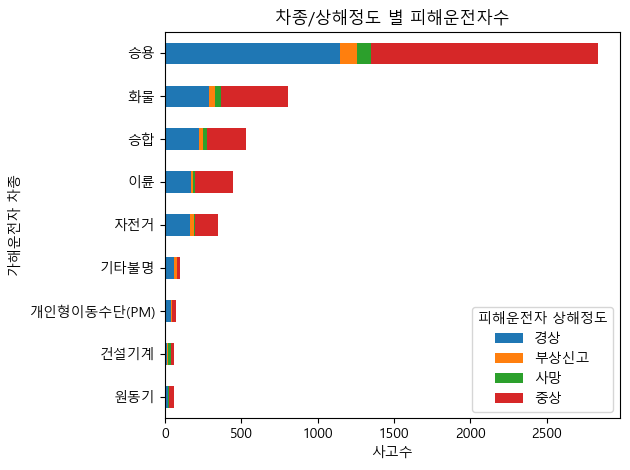

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 여기에 실제 데이터를 로딩하는 코드를 작성하세요.
# 예: elderly_accidents_data = pd.read_csv('data.csv')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터를 준비합니다.
# 이 부분에 'elderly_accidents_data' 데이터프레임을 로드하는 코드를 추가하세요.

# 각 차종별로 피해운전자 상해정도의 개수를 계산합니다.
result = elderly_accidents_data.groupby(['가해운전자 차종', '피해운전자 상해정도']).size().unstack().fillna(0)

# 특정 차종을 결과에서 제외합니다.
result = result.drop(['사륜오토바이(ATV)', '농기계', '특수'], errors='ignore')

# 각 차종별 총 상해 개수를 계산하고 내림차순으로 정렬합니다.
result['총계'] = result.sum(axis=1)
result_sorted = result.sort_values('총계', ascending=False).drop('총계', axis=1)

# 그래프를 생성합니다.
fig, ax = plt.subplots()

# 가로 막대 그래프를 그립니다.
result_sorted.plot(kind='barh', stacked=True, ax=ax)

# 라벨과 제목을 추가합니다.
ax.set_xlabel('사고수')
ax.set_ylabel('가해운전자 차종')
ax.set_title('차종/상해정도 별 피해운전자수')

# 범례를 추가합니다.
ax.legend(title='피해운전자 상해정도')

# 그래프를 반전시켜 큰 값이 위로 오도록 합니다.
ax.invert_yaxis()

# 그래프를 표시합니다.
plt.tight_layout()  # 레이아웃을 조정하여 전체 그래프가 잘 보이도록 합니다.
plt.show()


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터를 준비합니다.
df = elderly_accidents_data.groupby(['가해운전자 차종', '피해운전자 상해정도']).size().reset_index(name='counts')

# 멀티레벨 파이 차트를 생성합니다.
fig = px.sunburst(df, path=['가해운전자 차종', '피해운전자 상해정도'], values='counts')

# 차트를 표시합니다.
fig.show()

In [41]:
# 피해운전자 성별이 여성인 데이터에서 피해운전자 상해정도가 '사망' 또는 '중상'인 수
female_fatal_or_serious = len(elderly_accidents_data[(elderly_accidents_data['피해운전자 성별'] == '여') & ((elderly_accidents_data['피해운전자 상해정도'] == '사망') | (elderly_accidents_data['피해운전자 상해정도'] == '중상'))])

# 피해운전자 성별이 남성인 데이터에서 피해운전자 상해정도가 '사망' 또는 '중상'인 수
male_fatal_or_serious = len(elderly_accidents_data[(elderly_accidents_data['피해운전자 성별'] == '남') & ((elderly_accidents_data['피해운전자 상해정도'] == '사망') | (elderly_accidents_data['피해운전자 상해정도'] == '중상'))])

# 결과 출력
print("피해운전자 성별이 여성인 데이터 중 사망 또는 중상인 수:", female_fatal_or_serious)
print("피해운전자 성별이 남성인 데이터 중 사망 또는 중상인 수:", male_fatal_or_serious)


피해운전자 성별이 여성인 데이터 중 사망 또는 중상인 수: 1913
피해운전자 성별이 남성인 데이터 중 사망 또는 중상인 수: 985


In [44]:
# 피해운전자 성별이 남성인 데이터를 필터링하여 각 구별 사고 수 집계
male_accidents_by_district = elderly_accidents_data[elderly_accidents_data['피해운전자 성별'] == '남']['구'].value_counts()

# 피해운전자 성별이 여성인 데이터를 필터링하여 각 구별 사고 수 집계
female_accidents_by_district = elderly_accidents_data[elderly_accidents_data['피해운전자 성별'] == '여']['구'].value_counts()

# 남성이 사고가 가장 많이 나는 구와 해당 구에서 발생한 사고 수
most_male_accident_district = male_accidents_by_district.idxmax()
most_male_accident_count = male_accidents_by_district.max()

# 여성이 사고가 가장 많이 나는 구와 해당 구에서 발생한 사고 수
most_female_accident_district = female_accidents_by_district.idxmax()
most_female_accident_count = female_accidents_by_district.max()

# 전체 사고 수
total_accidents = len(elderly_accidents_data)

# 각 구에서 발생한 사고와 전체 사고 수의 비율 계산
male_accident_ratio = most_male_accident_count / total_accidents
female_accident_ratio = most_female_accident_count / total_accidents

# 결과 출력
print("남성이 사고가 가장 많이 나는 구:", most_male_accident_district, "(", most_male_accident_count, "건)", "비율:", male_accident_ratio)
print("여성이 사고가 가장 많이 나는 구:", most_female_accident_district, "(", most_female_accident_count, "건)", "비율:", female_accident_ratio)


남성이 사고가 가장 많이 나는 구: 동대문구 ( 155 건) 비율: 0.029333838001514005
여성이 사고가 가장 많이 나는 구: 동대문구 ( 217 건) 비율: 0.0410673732021196


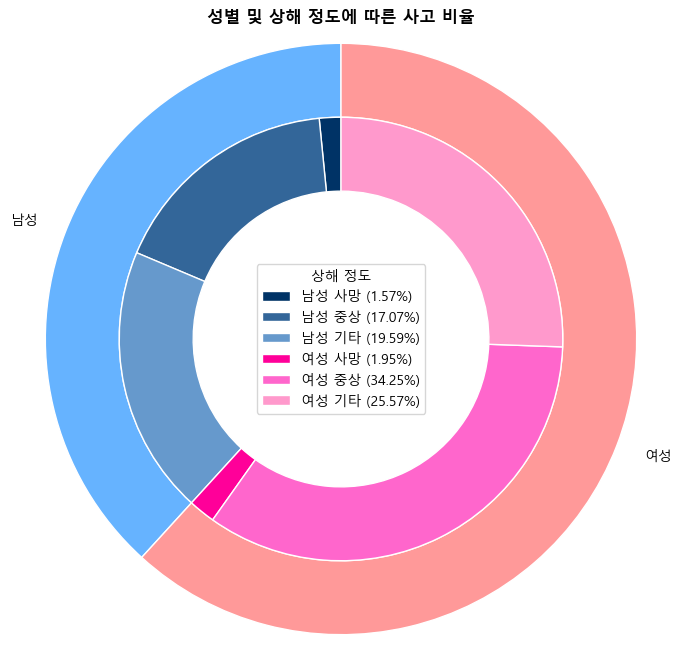

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 경로
file_path = 'elderly_accidents_data.csv'

# 데이터 불러오기
gender_injury_data = pd.read_csv(file_path)

# 상해 정도 분류 조건
conditions = [
    (gender_injury_data['피해운전자 성별'] == '남') & (gender_injury_data['피해운전자 상해정도'] == '사망'),
    (gender_injury_data['피해운전자 성별'] == '남') & (gender_injury_data['피해운전자 상해정도'] == '중상'),
    (gender_injury_data['피해운전자 성별'] == '남') & (~gender_injury_data['피해운전자 상해정도'].isin(['사망', '중상'])),
    (gender_injury_data['피해운전자 성별'] == '여') & (gender_injury_data['피해운전자 상해정도'] == '사망'),
    (gender_injury_data['피해운전자 성별'] == '여') & (gender_injury_data['피해운전자 상해정도'] == '중상'),
    (gender_injury_data['피해운전자 성별'] == '여') & (~gender_injury_data['피해운전자 상해정도'].isin(['사망', '중상']))
]
choices = ['남성 사망', '남성 중상', '남성 기타', '여성 사망', '여성 중상', '여성 기타']

# 조건에 따른 분류
gender_injury_data['상해정도 분류'] = np.select(conditions, choices, default='기타')

# 각 카테고리별 사례 수 계산
injury_counts = gender_injury_data['상해정도 분류'].value_counts()

# 도넛 차트를 위한 데이터 준비
outer_labels = ['남성', '여성']
outer_sizes = [injury_counts[['남성 사망', '남성 중상', '남성 기타']].sum(), injury_counts[['여성 사망', '여성 중상', '여성 기타']].sum()]
inner_labels = choices
inner_sizes = [injury_counts[choice] for choice in choices]

# 색상 팔레트 정의
outer_colors = ['#66b3ff','#ff9999']
inner_colors = ['#003366','#336699','#6699cc','#ff0099','#ff66cc','#ff99cc']

# Calculate percentages for each category
total_cases = sum(inner_sizes)
percentages = [f"{(size / total_cases) * 100:.2f}%" for size in inner_sizes]

# Create custom legend labels with percentages
legend_labels_with_percentages = [f"{label} ({percentage})" for label, percentage in zip(inner_labels, percentages)]

# 도넛 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))
outer_pie = ax.pie(outer_sizes, labels=outer_labels, radius=1.2, startangle=90, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'))
inner_pie = ax.pie(inner_sizes, radius=0.9, startangle=90, colors=inner_colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Create a custom legend with percentages
ax.legend(inner_pie[0], legend_labels_with_percentages, title="상해 정도", loc="center", bbox_to_anchor=(0.5, 0.5))

# 제목 추가
plt.title('성별 및 상해 정도에 따른 사고 비율', weight='bold')

# 차트 표시
plt.show()

In [67]:
# !pip install seaborn

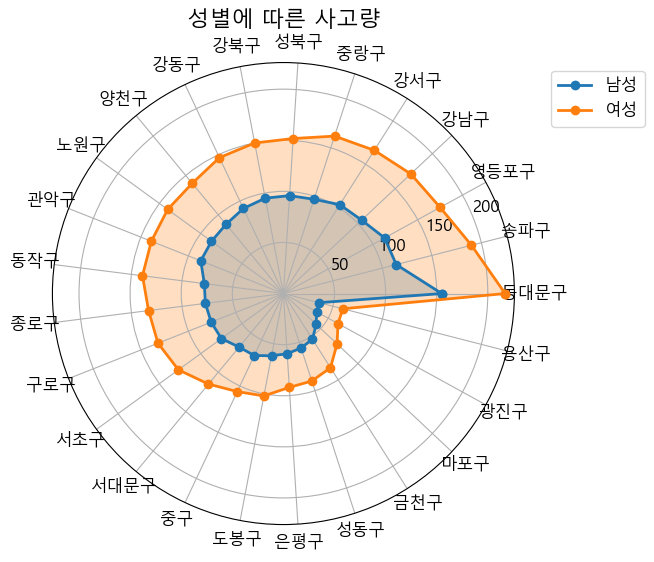

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# '시군구'에서 구 이름 추출
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'서울특별시\s([가-힣]+구)')

# 남성과 여성 사고량 데이터 가져오기
male_accidents_data = elderly_accidents_data[elderly_accidents_data['피해운전자 성별'] == '남']
female_accidents_data = elderly_accidents_data[elderly_accidents_data['피해운전자 성별'] == '여']

# 각 구의 남성과 여성 사고량 집계
male_accidents_by_gu = male_accidents_data['구'].value_counts()
female_accidents_by_gu = female_accidents_data['구'].value_counts()

# 레이더 차트 생성
plt.figure(figsize=(10, 6))
categories = male_accidents_by_gu.index.tolist()
num_categories = len(categories)

# 각 성별에 대한 사고량 데이터 리스트 생성
male_values = male_accidents_by_gu.tolist()
female_values = female_accidents_by_gu.tolist()
male_values += [male_values[0]]
female_values += [female_values[0]]

# 레이더 차트 그리기
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]

plt.polar(angles, male_values, 'o-', label='남성', linewidth=2)
plt.fill(angles, male_values, alpha=0.25)
plt.polar(angles, female_values, 'o-', label='여성', linewidth=2)
plt.fill(angles, female_values, alpha=0.25)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks(fontsize=12)
plt.title('성별에 따른 사고량', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=12)  # 범례를 그래프 밖에 위치

plt.show()


C:\Users\kkt82\AppData\Local\Temp\ipykernel_8424\2159373138.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_age_accidents = male_data.groupby('연령대')['사고번호'].count()
C:\Users\kkt82\AppData\Local\Temp\ipykernel_8424\2159373138.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_age_accidents = female_data.groupby('연령대')['사고번호'].count()


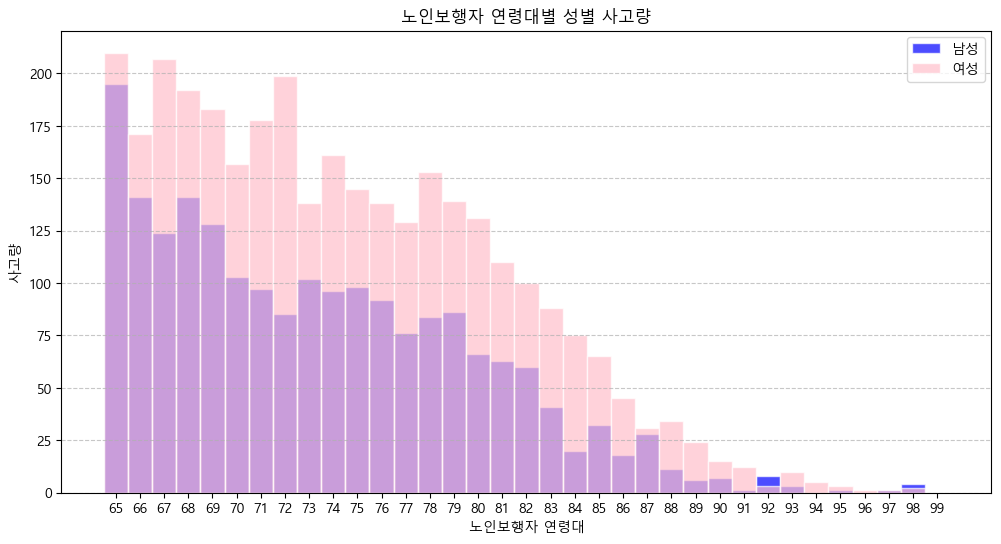

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("elderly_accidents_data.csv")

# 피해운전자 연령대 구간 설정 (1년 단위)
age_bins = list(range(65, 101))

# 피해운전자 연령대 카테고리 추가
data['연령대'] = pd.cut(data['피해운전자 연령'], bins=age_bins, right=False)

# 남성과 여성 데이터 분리
male_data = data[data['피해운전자 성별'] == '남']
female_data = data[data['피해운전자 성별'] == '여']

# 남성과 여성 각각의 피해운전자 연령대별 사고량 집계
male_age_accidents = male_data.groupby('연령대')['사고번호'].count()
female_age_accidents = female_data.groupby('연령대')['사고번호'].count()

# 여성의 사고량을 양수로 변환
female_age_accidents = female_age_accidents.abs()

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 남성 연령대별 사고량 그래프
ax.bar(age_bins[:-1], male_age_accidents, width=1, label='남성', color='blue', alpha=0.7, edgecolor='white')

# 여성 연령대별 사고량 그래프
ax.bar(age_bins[:-1], female_age_accidents, width=1, label='여성', color='pink', alpha=0.7, edgecolor='white')

ax.set_xlabel('노인보행자 연령대')
ax.set_ylabel('사고량')
ax.set_title('노인보행자 연령대별 성별 사고량')
ax.legend()

plt.xticks(age_bins[:-1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
df = elderly_accidents_data

# '사고일시'에서 시간 부분을 추출
df['시간'] = df['사고일시'].str.extract('(\d+)시').astype(int)

# 10시부터 17시 사이의 사고 수 계산
accidents_count = df[(df['시간'] >= 10) & (df['시간'] <= 17)].shape[0]

accidents_count

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_22232\1217878752.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['시간'] = df['사고일시'].str.extract('(\d+)시').astype(int)


3021

In [5]:
df = elderly_accidents_data

# '사고일시'에서 월 부분 추출
df['월'] = df['사고일시'].str.extract('(\d+)월').astype(int)

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

print(monthly_accidents)


월
1     463
2     417
3     379
4     421
5     481
6     460
7     436
8     394
9     457
10    474
11    473
12    429
dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_22232\417768605.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['월'] = df['사고일시'].str.extract('(\d+)월').astype(int)


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_22232\2584988227.py:11: SyntaxWarning: invalid escape sequence '\d'
  elderly_accidents_data['월'] = elderly_accidents_data['사고일시'].str.extract('(\d+)월').astype(int)


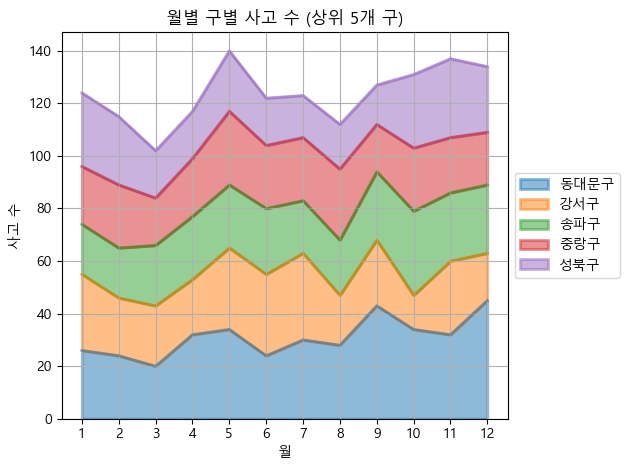

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# '시군구'에서 구 이름만 추출
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'서울특별시\s([가-힣]+구)')

# '사고일시'에서 월 부분 추출
elderly_accidents_data['월'] = elderly_accidents_data['사고일시'].str.extract('(\d+)월').astype(int)

# 월별, 구별 사고 수 집계
monthly_accidents = elderly_accidents_data.groupby(['월', '구']).size().unstack(fill_value=0)

# 사고가 가장 많은 상위 5개 구를 선택
top_5_districts = monthly_accidents.sum().sort_values(ascending=False).head(5).index
top_5_data = monthly_accidents[top_5_districts]

# 스택드 에어리어 그래프 그리기
ax = top_5_data.plot(kind='area', stacked=True, alpha=0.5, linewidth=2)
plt.title('월별 구별 사고 수 (상위 5개 구)')
plt.xlabel('월')
plt.ylabel('사고 수')

# X축에 1개월 단위로 표시
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# 보조선 추가
plt.grid(True)
# 범례 위치 조정 (예: 그래프 밖의 오른쪽 중앙)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_22232\2515908694.py:8: SyntaxWarning: invalid escape sequence '\d'
  elderly_accidents_data['시간대'] = elderly_accidents_data['사고일시'].str.extract('(\d+시)')


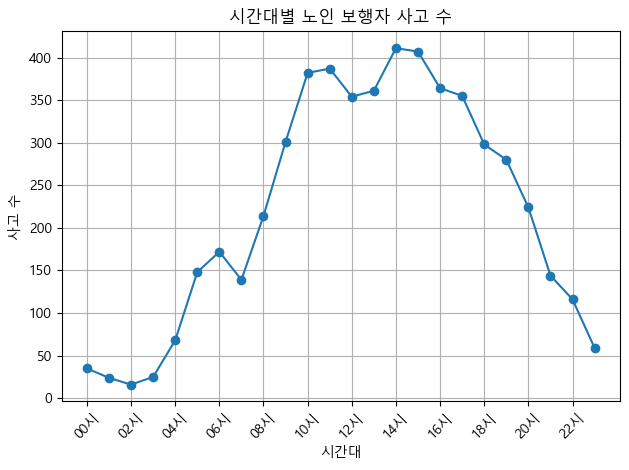

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# '사고일시'에서 시간대 부분 추출 (예: "2020년 1월 1일 15시"에서 "15시"를 추출)
elderly_accidents_data['시간대'] = elderly_accidents_data['사고일시'].str.extract('(\d+시)')

# 시간대별 사고 수 집계
hourly_accidents = elderly_accidents_data.groupby(['시간대']).size()

# 꺾은선 그래프 그리기
plt.plot(hourly_accidents.index, hourly_accidents.values, marker='o', linestyle='-')
plt.title('시간대별 노인 보행자 사고 수')
plt.xlabel('시간대')
plt.ylabel('사고 수')

# X축에 간격을 두고 표시 (예: 2시간 간격)
plt.xticks(hourly_accidents.index[::2], rotation=45)

# 보조선 추가
plt.grid(True)

plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_22232\54152131.py:8: SyntaxWarning: invalid escape sequence '\d'
  elderly_accidents_data['일'] = elderly_accidents_data['사고일시'].str.extract('(\d+)일').astype(int)


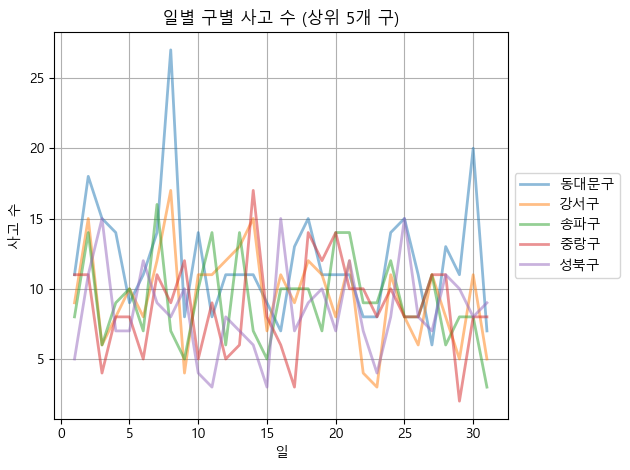

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# '시군구'에서 구 이름만 추출
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'서울특별시\s([가-힣]+구)')

# '사고일시'에서 일 부분 추출
elderly_accidents_data['일'] = elderly_accidents_data['사고일시'].str.extract('(\d+)일').astype(int)

# 일별, 구별 사고 수 집계
daily_accidents = elderly_accidents_data.groupby(['일', '구']).size().unstack(fill_value=0)

# 사고가 가장 많은 상위 5개 구를 선택
top_5_districts = daily_accidents.sum().sort_values(ascending=False).head(5).index
top_5_data = daily_accidents[top_5_districts]

# Line plot instead of stacked area plot
ax = top_5_data.plot(kind='line', alpha=0.5, linewidth=2)

plt.title('일별 구별 사고 수 (상위 5개 구)')
plt.xlabel('일')
plt.ylabel('사고 수')

# Gridlines
plt.grid(True)

# Adjust legend position
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [15]:
# 60세 미만 데이터의 개수 확인
under_60_count = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] < 60].shape[0]

# 60세 이상 데이터만 필터링
data_over_60 = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] >= 60]

under_60_count, data_over_60.shape

# 교통사고 데이터에서 각 구별 사고 발생 건수 집계
# '구' 컬럼에서 '서울특별시'를 제거하고, 구 이름만 남김
data_over_60['구'] = data_over_60['구'].str.replace('서울특별시 ', '')
accident_counts_by_district = data_over_60['구'].value_counts()

# 교통사고 발생 건수 데이터프레임 생성
accident_counts_df = accident_counts_by_district.reset_index()
accident_counts_df.columns = ['구', '사고 발생 건수']

# 인구수 데이터프레임과 교통사고 발생 건수 데이터프레임 병합
merged_data = pd.merge(population_data_elderly, accident_counts_df, left_on='동별(1)', right_on='구')

# 노인 인구수 대비 교통사고 비율 계산
merged_data['사고 비율(%)'] = (merged_data['사고 발생 건수'] / merged_data['노인 인구수']) * 100

# 결과 확인 (처음 몇 줄만 출력)
merged_data[['구', '노인 인구수', '사고 발생 건수', '사고 비율(%)']].head()

merged_data.to_csv('노인보행자전처리완료.csv', index=False)

In [30]:
import pandas as pd
import folium
import json
import webbrowser

# 서울시 지도 생성 및 Choropleth 레이어 추가
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
geo_path = 'new_seoul_geo.json'
with open(geo_path, 'r', encoding='utf-8') as geo_file:
    seoul_geo = json.load(geo_file)

choropleth = folium.Choropleth(
    geo_data=seoul_geo,
    name='choropleth',
    data=merged_data,
    columns=['구', '사고 발생 건수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인보행자 사고 발생 건수'
).add_to(seoul_map)

# 팝업 추가
for feature in seoul_geo['features']:
    district_name = feature['properties']['name']
    accidents = merged_data[merged_data['구'] == district_name]['사고 발생 건수'].values[0]
    popup = folium.Popup(f"{district_name}<br>사고 발생 건수: {accidents}", max_width=300)
    
    folium.GeoJson(
        data=feature,
        style_function=lambda feature: {
            'fillColor': 'transparent',
            'color': 'none',
            'weight': 2,
            'dashArray': '5, 5'
        },
        highlight_function=lambda feature: {
            'fillColor': 'transparent',
            'color': 'green',
            'weight': 3,
        },
        tooltip=f'{district_name}'
    ).add_child(popup).add_to(seoul_map)

# 구 이름 표시
centers_path = 'centers.json'
with open(centers_path, 'r', encoding='utf-8') as file:
    centers = json.load(file)

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(
            html=f"<div style='font-size: 10px; font-family: \"Noto Sans KR\", sans-serif; "
                 f"color: #2c3e50; text-align: center; background-color: #ecf0f1; "
                 f"border: 2px solid #3498db; border-radius: 10px; padding: 3px 6px; "
                 f"white-space: nowrap; display: inline-block;'>{name}</div>"
        )
    ).add_to(seoul_map)

# 지도를 HTML 파일로 저장
map_file_path = '33노인보행자 교통사고 구별 Choropleth.html'
seoul_map.save(map_file_path)

seoul_map


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("노인보행자전처리완료.csv")

# JSON으로 변환
json_data = df.to_json(orient="records", force_ascii=False)

# JSON 파일로 저장
with open("노인보행자전처리완료.json", "w", encoding="utf-8") as file:
    file.write(json_data)


In [1]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("종합db.csv")

# JSON으로 변환
json_data = df.to_json(orient="records", force_ascii=False)

# JSON 파일로 저장
with open("노인보행자종합.json", "w", encoding="utf-8") as file:
    file.write(json_data)
